# Titanic Survival Prediction

### Internship Task 1 – CodSoft Data Science Internship

This project uses machine learning to predict whether a passenger on the Titanic survived or not based on various features like age, gender, ticket class, and fare.

**Model Used:** Random Forest Classifier  
**Accuracy Achieved:** 82%  

In [1]:
import pandas as pd


In [2]:
#load dataset
df = pd.read_csv("Titanic-Dataset.csv")

#display the first 5 row
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#fill missing age with median age
df['Age'].fillna(df['Age'].median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
#filling the Embarked with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
#drop carbin due to too many null values
df.drop(columns=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
#truning the values of gender to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [8]:
#getting all unique values of Embarked column
df['Embarked'].unique()
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
#since the Embarked has just three possible values then we can perfrom one-hot-encoding to seperate in different columns
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [10]:
#convert from true/false to 1/0
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0


In [12]:
#dropping columns that wont help in prediction
df_temp = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [13]:
#Normalize/Scale Numeric Values
from sklearn.preprocessing import MinMaxScaler

#pick only required columns
scaler = MinMaxScaler()
df_temp[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [14]:
#splitting into training and testing sets
from sklearn.model_selection import train_test_split

#choosing features (X) and target (y)
X = df_temp.drop(columns=['Survived']) # Features(everything except 'Survived')
y =  df_temp['Survived'] # Target (what we are trying to predict)

#Split into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [15]:
#Using Random Forest For Prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#check acuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


In [16]:
import matplotlib.pyplot as plt

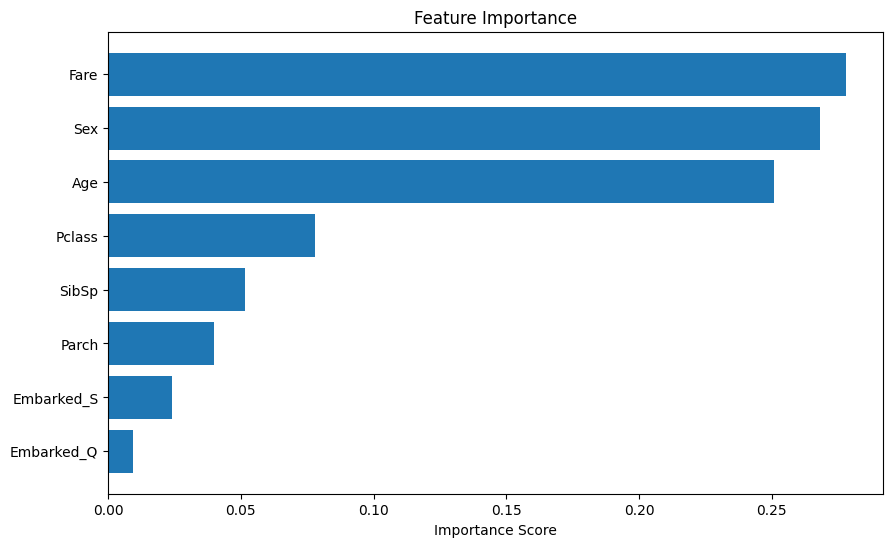

In [17]:
# get feature importances from the trained model
importances = model.feature_importances_

# match importance to feature names
feature_name = X.columns
feature_df = pd.DataFrame({'Feature':feature_name, 'Importance':importances})

# sort features by importance
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

# plot the results
plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

In [18]:
#Applying feature engineering for better accuracy

#extract title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\VHOU\AppData\Local\Temp\ipykernel_13128\901109418.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [19]:
# Replace rare titles with others

df['Title'] = df['Title'].replace(['Master', 'Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'Countess',
       'Jonkheer'], 'Other')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Other', 'Mme', 'Ms', 'Mlle'], dtype=object)

In [20]:
# Replace alternative forms
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [21]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Other'], dtype=object)

In [23]:

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0,Mr


In [24]:
# Convert title to numbers
df = pd.get_dummies(df, columns = ['Title'], drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0,True,False,False


In [27]:
# convert from true/false to 1/0
df[['Title_Mr','Title_Mrs', 'Title_Other']] = df[['Title_Mr','Title_Mrs', 'Title_Other']].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


In [32]:
#Train the model again

#preapare data
X = df.drop(columns=['Survived','PassengerId','Name','Ticket', 'Cabin'])
y = df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_text, 

#split again
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predict and check accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"New Accuracy with Title Feature: {accuracy:.2f}")



New Accuracy with Title Feature: 0.83


## 🎯 Conclusion

In this Titanic survival prediction task, we:

- Cleaned and explored the dataset
- Handled missing values using statistical techniques (mean for Age, mode for Embarked)
- Dropped irrelevant features (Cabin, Ticket, PassengerId)
- Converted categorical data (Sex, Embarked) into numeric using encoding
- Engineered a new feature: **Title**, extracted from passenger names
- Trained a **Random Forest Classifier** on the processed data
- Initially achieved an accuracy of **82%**
- After adding the Title feature, the model accuracy **increased to 83%**

This project demonstrates how **feature engineering can improve model performance** even with small tweaks. It’s a great reminder that data quality and creativity in preprocessing often matter more than fancy models. 🚀
